In [1]:
url = 'http://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/'

##Steps of Data Exploration and Preparation

1. Variable Identification
First, identify Predictor (Input) and Target (output) variables.
Next, identify the data type and category of the variables.

2. Univariate Analysis
Explore variables one by one. Also used to highlight missing and outlier values
In case of continuous variables, we need to understand the central tendency and spread of the variable.
For categorical variables, we’ll use frequency table to understand distribution of each category. We can also read as percentage of values under each category. It can be be measured using two metrics, Count and Count% against each category. Bar chart can be used as visualization.

3. Bi-variate Analysis
Finds out the relationship between two variables. Here, we look for association and disassociation between variables at a pre-defined significance level. We can perform bi-variate analysis for any combination of categorical and continuous variables. The combination can be: Categorical & Categorical, Categorical & Continuous and Continuous & Continuous.

While doing bi-variate analysis between two continuous variables, we should look at scatter plot.Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. 
To find the relationship between two categorical variables, we can use following methods:

Two-way table: We can start analyzing the relationship by creating a two-way table of count and count%. The rows represents the category of one variable and the columns represent the categories of the other variable. We show count or count% of observations available in each combination of row and column categories.
Stacked Column Chart: This method is more of a visual form of Two-way table.
Chi-Square Test: This test is used to derive the statistical significance of relationship between the variables. Also, it tests whether the evidence in the sample is strong enough to generalize that the relationship for a larger population as well. 
While exploring relation between categorical and continuous variables, we can draw box plots for each level of categorical variables. If levels are small in number, it will not show the statistical significance. To look at the statistical significance we can perform Z-test, T-test or ANOVA.


4. Missing values treatment
4.1. Deletion:are used when the nature of missing data is “Missing completely at random” else non random missing values can bias the model output.

In list wise deletion, we delete observations where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.
In pair wise deletion, we perform analysis with all cases in which the variables of interest are present. Advantage of this method is, it keeps as many cases available for analysis. One of the disadvantage of this method, it uses different sample size for different variables.

4.2. Mean/ Mode/ Median Imputation: Imputation is a method to fill in the missing values with estimated ones.It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable. 
It can be of two types:-
Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
Similar case Imputation: In this case, we calculate average for gender “Male” (29.75) and “Female” (25) individually of non missing values then replace the missing value based on gender.

4.3 Prediction Model:In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.We can use regression, ANOVA, Logistic regression and various modeling technique to perform this.

4.4.KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function.


5. Outlier treatment
Outlier can be of two types: Univariate and Multivariate. Some analysts also various thumb rules to detect outliers. Some of them are:

5.1.1.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
5.1.2.Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
5.1.3.Data points, three or more standard deviation away from mean are considered outlier
5.1.4.Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding
5.1.5.Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.

5.2. Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods.

6. Variable transformation
In data modelling, transformation refers to the replacement of a variable by a function.Transformation is a process that changes the distribution or relationship of a variable with others.There are various methods used to transform variables. Some of them include square root, cube root, logarithmic, binning, reciprocal and many others. 

7. Variable creation
Feature / Variable creation is a process to generate a new variables / features based on existing variable(s). For example, say, we have date(dd-mm-yy) as an input variable in a data set. We can generate new variables like day, month, year, week, weekday that may have better relationship with target variable. 
There are various techniques to create new features:
7.1.Creating derived variables
7.2.Creating dummy variables: One of the most common application of dummy variable is to convert categorical variable into numerical variables.

In [53]:
import pandas as pd
import numpy as np

In [54]:
#importing modules and loading the data set
data = pd.read_csv("trainLoanPrediction.csv",index_col="Loan_ID")

In [55]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
#1 – Boolean Indexing
#Filter values of a column based on conditions from another set of columns?
#For instance, we want a list of all females who are not graduate and got a loan.
#DataFrame.loc
#Purely label-location based indexer for selection by label.
url = "http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.loc.html"
data.loc[(data["Gender"] == "Female") & (data["Education"] == "Not Graduate")
        & (data["Loan_Status"] == "Y"),["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [57]:
#2 – Apply Function
url = "http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html"
#Commonly used functions for playing with data and creating new variables.
#Apply returns some value after passing each row/column of a data frame with some function.
# For instance, here it can be used to find the #missing values in each row and column.

#Create a new function to find the total number of missing values
def numMissing(x):
    return sum(x.isnull())
#Applying per column
#axis=0 defines that function is to be applied on each column
print ("Missing values per column:")
print (data.apply(numMissing, axis = 0))

#Applying per row:
#axis=1 defines that function is to be applied on each row
#Note: head() function is used in second output because it contains many rows.
print ("\nMissing values per row:")
print (data.apply(numMissing, axis = 1).head())

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [58]:
#3 – Imputing missing files
#‘fillna()’ is used for updating missing values with the overall mean/mode/median
#of the column. 
#Let’s impute the ‘Gender’, ‘Married’ and ‘Self_Employed’ columns with their respective modes
#First we import a function to determine the mode

#from scipy.stats import mode
#mode(data['Gender'])

# mode for categorical data

from collections import Counter
data1 = Counter(data['Gender'])
data1.most_common()   # Returns all unique items and their counts
#data1.most_common(1)  # Returns the highest occurring item




[('Male', 489), ('Female', 112), (nan, 13)]

In [59]:
# from python 3.4
from statistics import mode
mode(data["Gender"])


'Male'

In [60]:
#Impute the values with the mode value in example it is  the first value:
#mode(data['Gender']).mode[0]
data['Gender'].fillna(mode(data['Gender']), inplace=True)
data['Married'].fillna(mode(data['Married']), inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']), inplace=True)

In [61]:
#Now check the #missing values again to confirm:
print (data.apply(numMissing, axis=0))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [64]:
#4 – Pivot Table
#For instance, in this case, a key column is “LoanAmount” 
#which has missing values. We can impute it using mean amount of each ‘Gender’, ‘Married’ and ‘Self_Employed’ group. 
#The mean ‘LoanAmount’ of each group can be determined as:
impute_grps = data.pivot_table(values=["LoanAmount"], 
                               index=["Gender","Married","Self_Employed"], 
                               aggfunc=np.mean)
print (impute_grps)


                              LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833


In [69]:
#5 – Multi-Indexing
#If you notice the output of step #3, 
#it has a strange property. Each index is made up of a combination of 3 values. 
#This is called Multi-Indexing. It helps in performing operations really fast.


url = "http://pandas.pydata.org/pandas-docs/stable/advanced.html"
    
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]
#iterate only through rows with missing LoanAmount

#Now check the #missing values again to confirm:
print (data.apply(numMissing, axis=0))
    

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


#6. Crosstab

This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis. For instance, in this case, “Credit_History” is expected to affect the loan status significantly.

In [71]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins = True)
# with margins = true you get the all column and row

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,192,422,614


In [72]:
# to make the absolute numbers as percentages
def percConvert(ser):
    return ser/float(ser[-1])
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins = True).apply(percConvert,axis = 1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.312704,0.687296,1.0


#7 – Merge DataFrames

Merging dataframes become essential when we have information coming from different sources to be collated. Consider a hypothetical case where the average property rates (INR per sq meters) is available for different property types. 

In [73]:
propRates = pd.DataFrame([1000,5000,12000],index = ["Rural","Semiurban","Urban"],columns=["rates"])
propRates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [75]:
#merge this information with the original dataframe
dataMerged = data.merge(right = propRates,how = 'inner',left_on = 'Property_Area',
                        right_index = True,sort = False)
dataMerged.pivot_table(values ='Credit_History',index=['Property_Area','rates'],aggfunc = len)

Property_Area  rates
Rural          1000     179.0
Semiurban      5000     233.0
Urban          12000    202.0
Name: Credit_History, dtype: float64

#8 – Sorting DataFrames

Pandas allow easy sorting based on multiple columns. 

In [77]:
dataSorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'],ascending=False)

In [78]:
dataSorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
LP002422,37719,0.0
LP001637,33846,0.0
LP001448,23803,0.0
LP002624,20833,6667.0


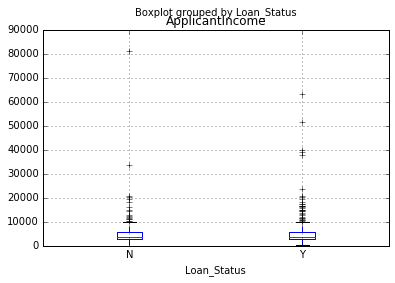

In [79]:
#9 – Plotting (Boxplot & Histogram)
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column='ApplicantIncome',by='Loan_Status')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001813F5AF278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000181415ECCC0>], dtype=object)

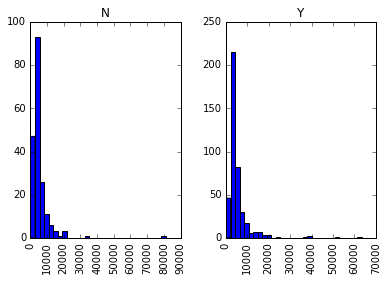

In [80]:
data.hist(column='ApplicantIncome',by='Loan_Status',bins=30)

#10 – Cut function for binning
Sometimes numerical values make more sense if clustered together.
a simple function which can be re-used for binning any variable fairly easily.

url = 'http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.cut.html'



In [90]:
#binning

def binning(col,cut_points,labels=None):
    #Define min and max values
    minVal = col.min()
    maxVal = col.max()
    
    #create list by adding min and max to cut_points
    break_points = [minVal] + cut_points + [maxVal]
    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)
        #Binning using cut function of pandas
        colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
        return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print (pd.value_counts(data["LoanAmount_Bin"], sort=False))
    

Series([], Name: LoanAmount_Bin, dtype: int64)


#11 – Coding nominal data

Often, we find a case where we’ve to modify the categories of a nominal variable.a generic function which takes in input as a dictionary and codes the values using ‘replace’ function in Pandas.
url ='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html#pandas.DataFrame.replace

In [96]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
            colCoded.replace(key, value, inplace=True)
            return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print ('\nAfter Coding:')
print (pd.value_counts(data["Loan_Status_Coded"]))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
Y    422
0    192
Name: Loan_Status_Coded, dtype: int64


#12 – Iterating over rows of a dataframe
It’s generally a good idea to manually define the column types.

In [97]:
#check current types
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_Bin        object
Loan_Status_Coded     object
dtype: object

Credit_History is a nominal variable but appearing as float. A good way to tackle such issues is to create a csv file with column names and types. This way, we can make a generic function to read the file and assign column data types.
url ='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html#pandas.DataFrame.iterrows'


In [103]:
#load the datatypes files
colTypes = pd.read_csv('datatypes.csv')

In [104]:
print (colTypes)

              feature         type
0              Gender  categorical
1             Married  categorical
2          Dependents  categorical
3           Education  categorical
4       Self_Employed  categorical
5     ApplicantIncome   continuous
6   CoapplicantIncome   continuous
7          LoanAmount   continuous
8    Loan_Amount_Term   continuous
9      Credit_History  categorical
10      Property_Area  categorical
11        Loan_Status  categorical


In [106]:
#After loading this file, we can iterate through each row and assign the datatype 
#using column ‘type’ to the variable name defined in the ‘feature’ column.
#Iterate through each row and assign variable type.
#Note: astype is used to assign types

for i, row in colTypes.iterrows():  #i: dataframe index; row: each row in series format
    if row['type']=="categorical":
        data[row['feature']]=data[row['feature']].astype(np.object)
    elif row['type']=="continuous":
        data[row['feature']]=data[row['feature']].astype(np.float)
print (data.dtypes)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
LoanAmount_Bin        object
Loan_Status_Coded     object
dtype: object
